[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PyPartMC-examples/blob/main/notebooks/particle_simulation.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC-examples/blob/main/notebooks/particle_simulation.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC-examples.git/main?urlpath=lab/tree/notebooks/particle_simulation.ipynb)

In [1]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2023 University of Illinois Urbana-Champaign
# Authors:
#  - https://github.com/compdyn/partmc/graphs/contributors
#  - https://github.com/open-atmos/PyPartMC/graphs/contributors

In [2]:
import sys

if "google.colab" in sys.modules:
    !pip --verbose install PyPartMC

In [3]:
import PyPartMC as ppmc
from PyPartMC import si
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
gas_data = ppmc.GasData(("H2SO4", "HNO3", "HCl", "NH3", "NO", "NO2"))

In [5]:
env_state = ppmc.EnvState(
    {
        "rel_humidity": 0.95,
        "latitude": 0,
        "longitude": 0,
        "altitude": 0 * si.m,
        "start_time": 81000 * si.s,
        "start_day": 200,
    }
)

In [6]:
aero_data = ppmc.AeroData(
    (
        #         density  ions in soln (1) molecular weight    kappa (1)
        #         |                     |   |                   |
        {"SO4": [1800 * si.kg / si.m**3, 1, 96.0 * si.g / si.mol, 0.00]},
        {"NO3": [1800 * si.kg / si.m**3, 1, 62.0 * si.g / si.mol, 0.00]},
        {"Cl": [2200 * si.kg / si.m**3, 1, 35.5 * si.g / si.mol, 0.00]},
        {"NH4": [1800 * si.kg / si.m**3, 1, 18.0 * si.g / si.mol, 0.00]},
        {"MSA": [1800 * si.kg / si.m**3, 0, 95.0 * si.g / si.mol, 0.53]},
        {"ARO1": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
        {"ARO2": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
        {"ALK1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
        {"OLE1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
        {"API1": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
        {"API2": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
        {"LIM1": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
        {"LIM2": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
        {"CO3": [2600 * si.kg / si.m**3, 1, 60.0 * si.g / si.mol, 0.00]},
        {"Na": [2200 * si.kg / si.m**3, 1, 23.0 * si.g / si.mol, 0.00]},
        {"Ca": [2600 * si.kg / si.m**3, 1, 40.0 * si.g / si.mol, 0.00]},
        {"OIN": [2600 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.10]},
        {"OC": [1400 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.10]},
        {"BC": [1800 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.00]},
        {"H2O": [1000 * si.kg / si.m**3, 0, 18.0 * si.g / si.mol, 0.00]},
    )
)

In [7]:
gas_state = ppmc.GasState(gas_data)

input_gas_state = (
    {"H2SO4": [0.1]},
    {"HNO3": [0.2]},
    {"HCl": [0.3]},
    {"NH3": [0.5]},
    {"NO": [0.4]},
    {"NO2": [0.1]},
)
gas_state.mix_rats = input_gas_state

In [8]:
times = [0 * si.s, 12 * 3600 * si.s]
back_gas = [{"time": times}, {"rate": [0 / si.s, 0 / si.s]}, {}]
emit_gas = [
    {"time": times},
    {"rate": [1 / si.s, 0 / si.s]},
    {"NO": [1e-9, 1e-9]},
    {"NO2": [2e-9, 2e-9]},
]

AERO_DIST_BACKGROUND = {
    "back_small": {
        "mass_frac": [{"SO4": [1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 3.2e9 / si.m**3,
        "geom_mean_diam": 0.02 * si.um,
        "log10_geom_std_dev": 0.161,
    },
    "back_large": {
        "mass_frac": [{"SO4": [1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 2.9e9 / si.m**3,
        "geom_mean_diam": 0.16 * si.um,
        "log10_geom_std_dev": 0.217,
    },
}

AERO_DIST_EMIT = {
    "gasoline": {
        "mass_frac": [{"OC": [0.8]}, {"BC": [0.2]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 5e7 / si.m**3,
        "geom_mean_diam": 5e-8 * si.m,
        "log10_geom_std_dev": 0.24,
    },
    "diesel": {
        "mass_frac": [{"OC": [0.3]}, {"BC": [0.7]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 1.6e8 / si.m**3,
        "geom_mean_diam": 5e-8 * si.m,
        "log10_geom_std_dev": 0.24,
    },
    "cooking": {
        "mass_frac": [{"OC": [0.1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 9e6 / si.m**3,
        "geom_mean_diam": 8.64e-8 * si.m,
        "log10_geom_std_dev": 0.28,
    },
}

In [9]:
scenario = ppmc.Scenario(
    gas_data,
    aero_data,
    {
        "temp_profile": [{"time": times}, {"temp": [290 * si.K, 290 * si.K]}],
        "pressure_profile": [
            {"time": times},
            {"pressure": [1000 * si.hPa, 1000 * si.hPa]},
        ],
        "height_profile": [{"time": times}, {"height": [200 * si.m, 200 * si.m]}],
        "gas_emissions": emit_gas,
        "gas_background": back_gas,
        "aero_emissions": [
            {"time": [0 * si.s]},
            {"rate": [1 / si.s]},
            {"dist": [AERO_DIST_EMIT]},
        ],
        "aero_background": [
            {"time": [0 * si.s]},
            {"rate": [0 / si.s]},
            {"dist": [AERO_DIST_BACKGROUND]},
        ],
        "loss_function": "none",
    },
)

In [10]:
T_INITIAL = 0.0
scenario.init_env_state(env_state, T_INITIAL)

In [11]:
AERO_DIST_INIT = [
    {
        "init_small": {
            "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
            "diam_type": "geometric",
            "mode_type": "log_normal",
            "num_conc": 3.2e9 / si.m**3,
            "geom_mean_diam": 0.02 * si.um,
            "log10_geom_std_dev": 0.161,
        },
        "init_large": {
            "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
            "diam_type": "geometric",
            "mode_type": "log_normal",
            "num_conc": 2.9e9 / si.m**3,
            "geom_mean_diam": 0.16 * si.um,
            "log10_geom_std_dev": 0.217,
        },
    }
]

aero_dist_init = ppmc.AeroDist(aero_data, AERO_DIST_INIT)

In [12]:
N_PART = 1000
aero_state = ppmc.AeroState(N_PART, aero_data)
aero_state.dist_sample(
    aero_dist_init,
    sample_prop=1.0,
    create_time=0.0,
    allow_doubling=True,
    allow_halving=True,
)

287

In [13]:
run_part_opt = ppmc.RunPartOpt(
    {
        "do_coagulation": True,
        "coag_kernel": "brown",
        "do_parallel": False,
        "do_nucleation": False,
        "do_camp_chem": False,
        "do_condensation": False,
        "t_max": 86400 * si.s,
        "del_t": 60 * si.s,
        "t_output": 0,
        "t_progress": 0,
        "allow_halving": True,
        "allow_doubling": True,
        "rand_init": 0,
    }
)

In [14]:
camp_core = ppmc.CampCore()
photolysis = ppmc.Photolysis()

In [15]:
N_STEPS = int(run_part_opt.t_max / run_part_opt.del_t)
num_conc = np.zeros(N_STEPS + 1)
num_conc[0] = aero_state.total_num_conc
mass_conc = np.zeros(N_STEPS + 1)
mass_conc[0] = aero_state.total_mass_conc
time = np.zeros(N_STEPS + 1)
gas_mix_rat = np.zeros((N_STEPS + 1, gas_state.n_spec))
gas_mix_rat[0, :] = gas_state.mix_rats

for i_time in range(1, N_STEPS + 1):
    ppmc.run_part_timestep(
        scenario,
        env_state,
        aero_data,
        aero_state,
        gas_data,
        gas_state,
        run_part_opt,
        camp_core,
        photolysis,
        i_time,
        T_INITIAL,
    )
    num_conc[i_time] = aero_state.total_num_conc
    mass_conc[i_time] = aero_state.total_mass_conc
    time[i_time] = env_state.elapsed_time
    gas_mix_rat[i_time, :] = gas_state.mix_rats

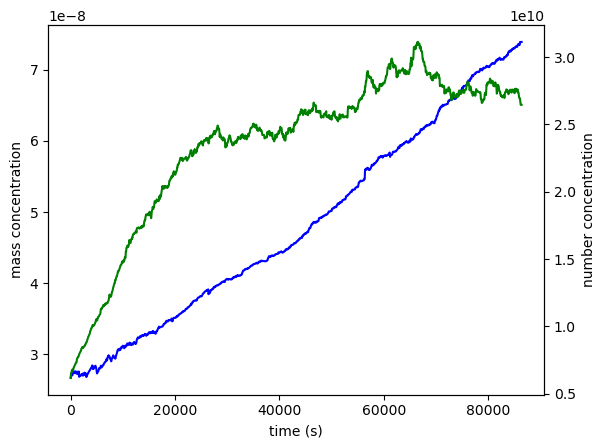

In [16]:
plt.plot(time, mass_conc, "b", label="mass conc")
plt.ylabel("mass concentration")
plt.xlabel("time (s)")
plt.twinx()
plt.plot(time, num_conc, "g", label="num conc")
plt.ylabel("number concentration");

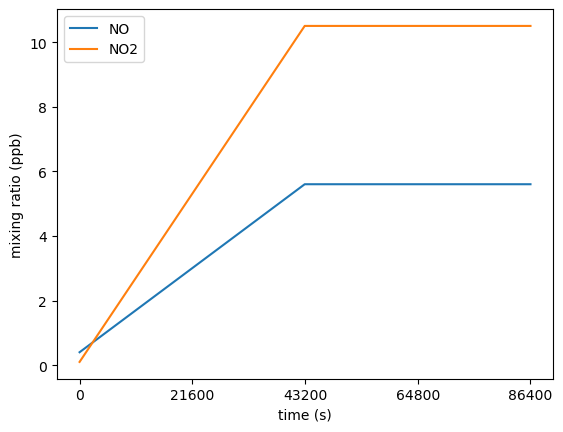

In [19]:
gases = ["NO", "NO2"]
for i_spec, spec in enumerate(gases):
    i_spec = gas_data.spec_by_name(spec)
    plt.plot(time, gas_mix_rat[:, i_spec], label=spec)
plt.xlabel("time (s)")
plt.ylabel("mixing ratio (ppb)")
plt.xticks(np.linspace(0, time[-1], 5))
plt.legend();

In [ ]:
diam_grid = ppmc.BinGrid(60, "log", 1e-9, 1e-6)
dry_diameters = aero_state.dry_diameters
num_concs = aero_state.num_concs
dist = ppmc.histogram_1d(diam_grid, dry_diameters, num_concs)
plt.plot(diam_grid.centers, dist)
plt.xscale("log")
plt.xlabel("dry diameter (m)")
plt.ylim(bottom=0)
bins = np.logspace(-9, -6, 61, base=10)
plt.hist(dry_diameters, bins=bins, weights=num_concs / np.log(bins[1] / bins[0]));

In [ ]:
mass_frac_grid = ppmc.BinGrid(100, "linear", 0, 1)
mass_frac_histogram = []
num_concs = aero_state.num_concs
dry_diameters = aero_state.dry_diameters
species_mass_frac = np.zeros(len(aero_state))
species_index = aero_data.spec_by_name("BC")
for i_part in range(len(aero_state)):
    particle = aero_state.particle(i_part)
    masses = particle.species_masses
    species_mass_frac[i_part] = masses[species_index] / np.sum(masses[0:19])
vals = ppmc.histogram_2d(
    diam_grid, dry_diameters, mass_frac_grid, species_mass_frac, num_concs
)

In [ ]:
plt.pcolormesh(
    diam_grid.edges,
    mass_frac_grid.edges,
    np.array(vals).T / 1e6,
    norm=matplotlib.colors.LogNorm(),
)
plt.xscale("log")
plt.xlim([1e-8, 1e-6])
plt.colorbar(label="Number concentration (# cm$^{-3}$)")
plt.xlabel("Dry diameter (m)")
plt.ylabel("OC mass fraction")
plt.grid();